In [8]:
import os
import random
from glob import glob
import torch

import torch.utils.data as data
import torchvision.transforms.functional as F
from torchvision import transforms
import numpy as np
from PIL import Image
import json
import cv2

from datasets.fsc_data import FSCData
from matplotlib import pyplot as plt
%matplotlib inline

data_dir = "./datasets/FSC"

In [9]:
train_dataset = FSCData(data_dir,
                            384,
                            16,
                            method='train')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


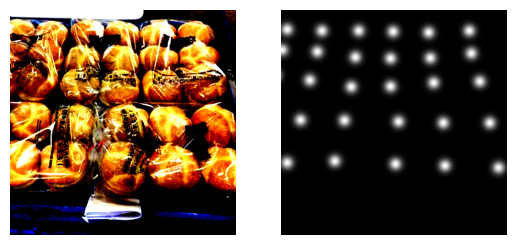

In [27]:
img, dmap, boxes = train_dataset[5]

fig, axes = plt.subplots(1, 2)

# Plot the image
axes[0].imshow(img.permute(1,2,0))
axes[0].axis('off')
axes[1].imshow(dmap.squeeze(0), cmap='gray')
axes[1].axis('off')

# Show the plot
plt.show()